In [3]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Creating a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Adding the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.61857742026291 25.087830416009325
8.10303829273954 85.1873570016644
17.019923629981463 -157.84871974390177
24.52216222059819 20.652253573788727
-37.99628425946501 104.16844957600608
52.002451928157484 -1.5530731085773368
19.884795401417264 93.93340785604755
87.14471347350332 -119.22270974713177
-87.74773583681377 1.7910634044442304
83.79537262695018 -135.47618574261745
-81.77808052039472 -179.21255563703522
34.93278184835236 -85.67181495328467
-59.979951439071755 -96.84797343519215
-0.08095265787299866 176.9899409238023
-85.69448713727608 -76.15303353058349
61.78366138503776 77.82379168852259
-69.68930930146105 -165.65673275043028
54.39943224060593 -80.99532875326133
30.00862774666318 -55.10197850131057
-31.849837125001592 12.545210644863403
66.39238638038321 -77.87577471185713
-21.424502377965595 39.919238788592736
-80.73216806601026 -33.03805289963529
10.106377026513016 84.65822036926528
70.83664724825815 -59.18431308556903
-16.879455563371337 19.18414925342401
-32.98966636427311 

In [7]:
from citipy import citipy

# Creating a list for holding the cities
cities = []

# Identifying the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm the sufficient count
len(cities)

599

In [8]:
# Importing the requests library
import requests

# Importing the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime 

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kutum
Processing Record 2 of Set 1 | kalmunai
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | jalu
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | banbury
Processing Record 7 of Set 1 | minbu
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | chattanooga
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | rungata
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | strezhevoy
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | oranjemund
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | toliary
City not found. Skipping...
Proce

Processing Record 37 of Set 4 | imeni zhelyabova
Processing Record 38 of Set 4 | menongue
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | mendi
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | guozhen
Processing Record 43 of Set 4 | bocana de paiwas
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | springdale
Processing Record 46 of Set 4 | qasigiannguit
Processing Record 47 of Set 4 | van buren
Processing Record 48 of Set 4 | riyadh
Processing Record 49 of Set 4 | hithadhoo
Processing Record 50 of Set 4 | urubicha
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | gao
Processing Record 4 of Set 5 | whitehorse
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | gizo
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | bahar
Processing Record 10 of Set 5 | dolinsk
Processi

Processing Record 27 of Set 8 | laguna
Processing Record 28 of Set 8 | adrar
Processing Record 29 of Set 8 | karistos
City not found. Skipping...
Processing Record 30 of Set 8 | porto seguro
Processing Record 31 of Set 8 | tortoli
Processing Record 32 of Set 8 | itarema
Processing Record 33 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 8 | yagodnoye
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | mitikas
Processing Record 37 of Set 8 | waitati
Processing Record 38 of Set 8 | cocobeach
Processing Record 39 of Set 8 | korla
Processing Record 40 of Set 8 | whithorn
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | rabo de peixe
Processing Record 43 of Set 8 | gorno-altaysk
Processing Record 44 of Set 8 | mocambique
City not found. Skipping...
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | camacha
Processing Record 47 of Set 8 | powell river
Processing Record 48 of Set 8 | karasjok
Processing

City not found. Skipping...
Processing Record 15 of Set 12 | awbari
Processing Record 16 of Set 12 | nyuksenitsa
Processing Record 17 of Set 12 | nabire
Processing Record 18 of Set 12 | zhangye
Processing Record 19 of Set 12 | duluth
Processing Record 20 of Set 12 | codrington
Processing Record 21 of Set 12 | bombay
Processing Record 22 of Set 12 | kuchurhan
Processing Record 23 of Set 12 | grand gaube
Processing Record 24 of Set 12 | yomitan
City not found. Skipping...
Processing Record 25 of Set 12 | bereda
Processing Record 26 of Set 12 | mulchen
Processing Record 27 of Set 12 | knysna
Processing Record 28 of Set 12 | oussouye
Processing Record 29 of Set 12 | bhopal
Processing Record 30 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 12 | acari
Processing Record 32 of Set 12 | nancalabasaan
City not found. Skipping...
Processing Record 33 of Set 12 | aswan
Processing Record 34 of Set 12 | nieuw nickerie
Processing Record 35 of Set 12 | marsh harbour

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kutum,14.2000,24.6667,62.33,16,2,9.95,SD,2022-11-25 21:25:24
1,Kalmunai,7.4167,81.8167,77.22,84,95,5.10,LK,2022-11-25 21:25:25
2,Hilo,19.7297,-155.0900,77.25,63,100,11.50,US,2022-11-25 21:21:19
3,Jalu,29.0331,21.5482,63.66,62,14,6.64,LY,2022-11-25 21:25:25
4,Busselton,-33.6500,115.3333,58.84,74,78,8.95,AU,2022-11-25 21:25:26


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kutum,SD,2022-11-25 21:25:24,14.2000,24.6667,62.33,16,2,9.95
1,Kalmunai,LK,2022-11-25 21:25:25,7.4167,81.8167,77.22,84,95,5.10
2,Hilo,US,2022-11-25 21:21:19,19.7297,-155.0900,77.25,63,100,11.50
3,Jalu,LY,2022-11-25 21:25:25,29.0331,21.5482,63.66,62,14,6.64
4,Busselton,AU,2022-11-25 21:25:26,-33.6500,115.3333,58.84,74,78,8.95
...,...,...,...,...,...,...,...,...,...
545,Garowe,SO,2022-11-25 21:39:54,8.4054,48.4845,71.94,77,0,11.92
546,Nargana,PA,2022-11-25 21:39:54,9.4428,-78.5906,80.92,83,59,8.28
547,Trinidad,BO,2022-11-25 21:39:55,-14.8333,-64.9000,96.78,46,20,4.61
548,Keti Bandar,PK,2022-11-25 21:39:55,24.1447,67.4497,75.09,55,33,5.77


In [17]:
# Creating the new output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

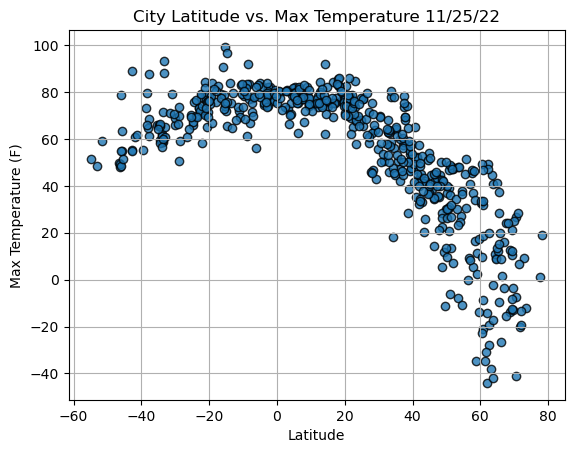

In [32]:
# Import the time module
import time

# Build the scatter plot for latitiude vs. longitude
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig1.png")

# Showing the plot
plt.show()

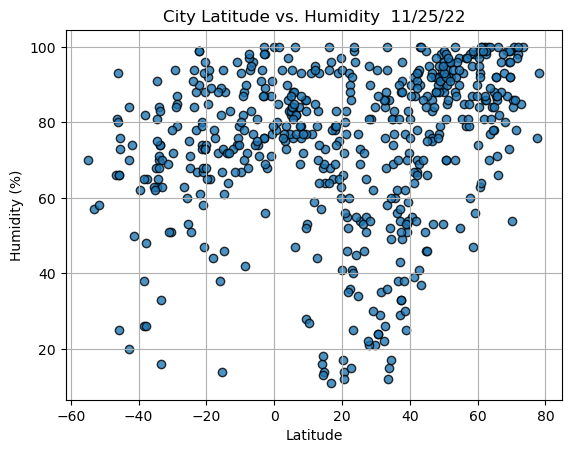

In [41]:
# Build the scatter plot for latitiude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Humidity  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig2.png")

# Showing the plot
plt.show()

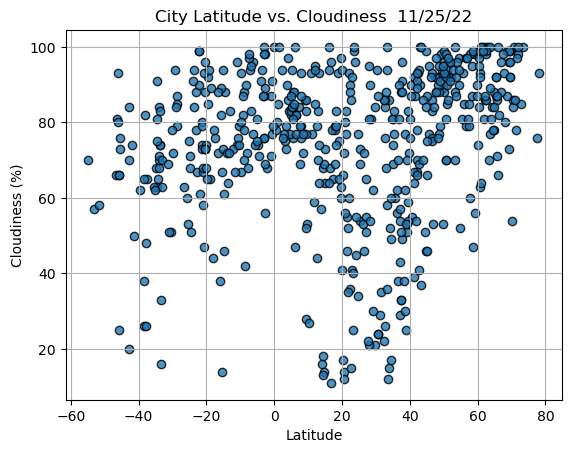

In [40]:
# Build the scatter plot for latitiude vs. cloudiness
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Cloudiness  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig3.png")

# Showing the plot
plt.show()

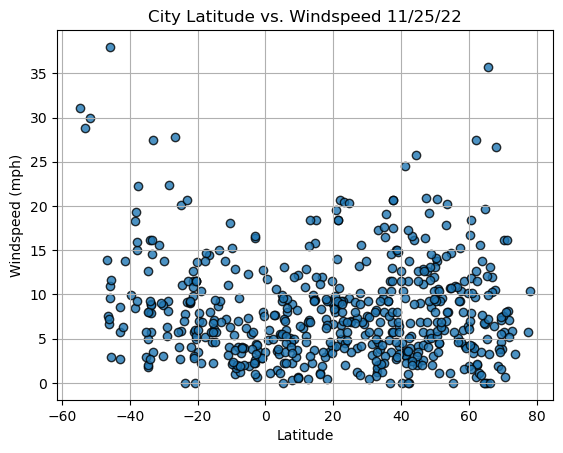

In [44]:
# Build the scatter plot for latitiude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Windspeed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig4.png")

# Showing the plot
plt.show()